# Energy efficiency (Энергоэффективность)

**Информация о наборе данных:**

Энергетический анализ с использованием 12 различных форм зданий, имитируемых в Ecotect. Здания отличаются друг от друга по отношению к области остекления, распределению площади остекления и ориентации, среди других параметров. Моделирование различных настроек как функции вышеупомянутых характеристик, для получения 768 форм здания. Набор данных содержит 768 выборок (объектов) и 8 признаков (атрибутов), предназначенных для прогнозирования двух реальных значений ответов.

**Тип признаков:**
Количественный


**Информация об атрибуте:**

Набор данных содержит восемь атрибутов (или функции, обозначенные X1 ... X8) и два ответа (или исходы, обозначаемые y1 и y2). Цель состоит в том, чтобы использовать восемь функций для прогнозирования каждого из двух ответов. 

**В частности:**
- `X1` Относительная компактность 
- `X2` Площадь поверхности 
- `X3` Площадь стены 
- `X4` Площадь крыши 
- `X5` Общая высота 
- `X6` Ориентация 
- `X7` Площадь остекления 
- `X8` Площадь остекления Распределение 
- `y1` Нагрузка на отопление 
- `y2` Охлаждающая нагрузка

где X1 - X8 входыне признаки, а Y1 и Y2 - ответы

*Для решения задачи анализа данных воспользуемся библиотеками numpy, pandas и scikit-learn. Библиотека numpy содержит реализации многомерных массивов и алгоритмов линейной алгебры. Библиотека pandas предоставляет широкий спектр функций по обработке табличных данных. Библиотека scikit-learn реализует множество алгоритмов машинного обучения. Кроме того, нам понадобится библиотека matplotlib для научной визуализации.*

Вначале подключим библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Считывание данных

In [2]:
url='https://raw.githubusercontent.com/NikolayMarushkin/Machine-Learning/master/ENB2012_data.csv'

In [3]:
data = pd.read_csv(url, sep = ',', engine = 'python')

## Анализируем данные

Тип данных

In [4]:
type(data)

pandas.core.frame.DataFrame

Вывод данных

In [5]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


Каждая строка вышеприведенной таблицы представляет собой форму здания, столбецы - Х1,...Х8 - призннаки, Y1, Y2 - результат расчета

In [6]:
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
5    0.90  563.5  318.5  122.50  7.0   3  0.0   0  21.46  25.38
6    0.90  563.5  318.5  122.50  7.0   4  0.0   0  20.71  25.16
7    0.90  563.5  318.5  122.50  7.0   5  0.0   0  19.68  29.60
8    0.86  588.0  294.0  147.00  7.0   2  0.0   0  19.50  27.30
9    0.86  588.0  294.0  147.00  7.0   3  0.0   0  19.95  21.97
10   0.86  588.0  294.0  147.00  7.0   4  0.0   0  19.34  23.49
11   0.86  588.0  294.0  147.00  7.0   5  0.0   0  18.31  27.87
12   0.82  612.5  318.5  147.00  7.0   2  0.0   0  17.05  23.77
13   0.82  612.5  318.5  147.00  7.0   3  0.0   0  17.41  21.46
14   0.82  612.5  318.5  147.00  7.0   4

Вывод первых 5 строк таблицы

In [7]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Вывод последних 5 строк таблицы

In [8]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


Размерность и наименование всех колонок таблицы

In [9]:
print(data.shape)
print(data.columns)

(768, 10)
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [10]:
data.index

RangeIndex(start=0, stop=768, step=1)

Вывод первого значения столбца Y1

In [11]:
data.at[0, 'Y1']

15.550000000000001

Вывод столбца Y1

In [12]:
data['Y1']

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
5      21.46
6      20.71
7      19.68
8      19.50
9      19.95
10     19.34
11     18.31
12     17.05
13     17.41
14     16.95
15     15.98
16     28.52
17     29.90
18     29.63
19     28.75
20     24.77
21     23.93
22     24.77
23     23.93
24      6.07
25      6.05
26      6.01
27      6.04
28      6.37
29      6.40
       ...  
738    41.09
739    40.79
740    38.82
741    39.72
742    39.31
743    39.86
744    14.41
745    14.19
746    14.17
747    14.39
748    12.43
749    12.63
750    12.76
751    12.42
752    14.12
753    14.28
754    14.37
755    14.21
756    14.96
757    14.92
758    14.92
759    15.16
760    17.69
761    18.19
762    18.16
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64

Еще один способ вывода первго значения стобца Y1

In [13]:
data['Y1'][0]

15.550000000000001

Тип данных Y2 столбца

In [14]:
data['Y2'].dtype.name

'float64'

Тип данных четвергото элемента столбца X1

In [15]:
type(data['X1'][3])

numpy.float64

Вывод первых трех столбцов и первых пяти строк

In [16]:
data[['X1', 'X2', 'X3']].head()

,X1,X2,X3
0,0.98,514.5,294.0
1,0.98,514.5,294.0
2,0.98,514.5,294.0
3,0.98,514.5,294.0
4,0.90,563.5,318.5


Информация по набору данных

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Основные статистические характеристики данных: По количественным признакам и результатам

In [18]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Информация по всем признакам и результатам

In [19]:
data.describe(include = 'all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Корелляция между признаками и результатами

In [20]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


Корелляция отдельно для площади поверхности больше 700

In [21]:
data[data["X2"] > 700.0].corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-0.997176,-0.997176,NaN,NaN,0.000000,3.370427e-17,-1.492558e-16,-0.466975,-0.327333
X2,-9.971765e-01,1.000000,1.000000,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.463329,0.309592
X3,-9.971765e-01,1.000000,1.000000,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.463329,0.309592
X4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,0.000000e+00,0.000000,0.000000,NaN,NaN,1.000000,0.000000e+00,0.000000e+00,0.005350,0.024783
X7,3.370427e-17,0.000000,0.000000,NaN,NaN,0.000000,1.000000e+00,2.129642e-01,0.716547,0.556244
X8,-1.492558e-16,0.000000,0.000000,NaN,NaN,0.000000,2.129642e-01,1.000000e+00,0.215438,0.115083
Y1,-4.669753e-01,0.463329,0.463329,NaN,NaN,0.005350,7.165470e-01,2.154384e-01,1.000000,0.891219
Y2,-3.273328e-01,0.309592,0.309592,NaN,NaN,0.024783,5.562438e-01,1.150827e-01,0.891219,1.000000


График зависимости вероятноти площади поверхности и нагрузки на отопление

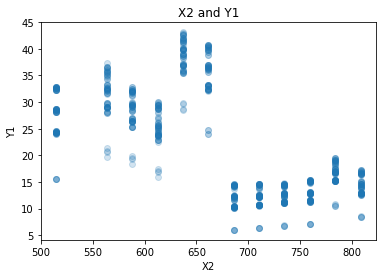

In [22]:
plt.plot(data['X2'], data['Y1'], 'o', alpha = 0.2)
plt.xlabel('X2')
plt.ylabel('Y1')
plt.title('X2 and Y1')
pass

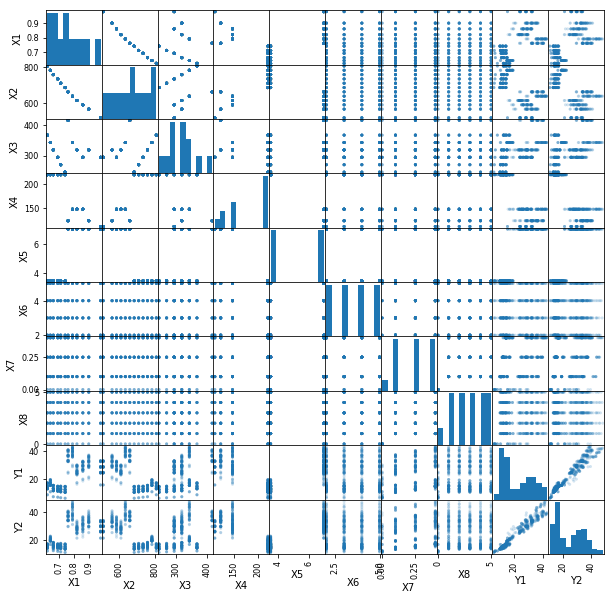

In [23]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data, alpha = .2, figsize = (10, 10))
pass

Последние 5 значений, где охлаждающая нагрузка будет больше 17 едениц

In [24]:
(data['Y2'] > 17.00).tail()

763     True
764    False
765     True
766    False
767    False
Name: Y2, dtype: bool

Диаграмма рассеяния переменных "y1 Нагрузка на отопление" и "y2 Охлаждающая нагрузка" для 3.5 и 7.0 Общей высоты.

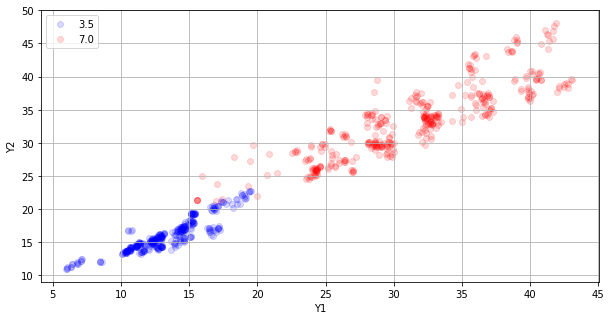

In [25]:
plt.figure(figsize = (10, 5))

plt.scatter(data[data['X5'] == 3.5]['Y1'],
            data[data['X5'] == 3.5]['Y2'],
            alpha = 0.15,
            label = '3.5',
            color = 'b')

plt.scatter(data[data['X5'] == 7.0]['Y1'],
            data[data['X5'] == 7.0]['Y2'],
            alpha = 0.15,
            label = '7.0',
            color = 'r')

plt.xlabel('Y1')
#plt.xticks(range(0,100))
#plt.xlim(0, 17)
plt.ylabel('Y2')
plt.legend()
plt.grid()

In [26]:
data.describe(include = ['float'])

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


Вывод уникальных значений в столбце

In [27]:
data['X1'].unique()

array([ 0.98,  0.9 ,  0.86,  0.82,  0.79,  0.76,  0.74,  0.71,  0.69,
        0.66,  0.64,  0.62])

Минимальное значение в столбце

In [28]:
data['Y1'].min()

6.0099999999999998

In [29]:
for name in data['X1'].unique():
    print(name, data['X2'][data['X1'] == name].iloc[0])

0.98 514.5
0.9 563.5
0.86 588.0
0.82 612.5
0.79 637.0
0.76 661.5
0.74 686.0
0.71 710.5
0.69 735.0
0.66 759.5
0.64 784.0
0.62 808.5


Проверка на количество одинаковых значений в столбце

In [30]:
data['X1'].unique().shape

(12,)

## Готовим данные

In [31]:
data['Y1'].dtype.name

'float64'

In [32]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
numerical_columns   = [c for c in data.columns if data[c].dtype.name == 'float64']
print(categorical_columns)
print(numerical_columns)

['X6', 'X8']
['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'Y1', 'Y2']


In [33]:
for c in numerical_columns:
    print(c, data[c].unique())

X1 [ 0.98  0.9   0.86  0.82  0.79  0.76  0.74  0.71  0.69  0.66  0.64  0.62]
X2 [ 514.5  563.5  588.   612.5  637.   661.5  686.   710.5  735.   759.5
  784.   808.5]
X3 [ 294.   318.5  343.   416.5  245.   269.5  367.5]
X4 [ 110.25  122.5   147.    220.5 ]
X5 [ 7.   3.5]
X7 [ 0.    0.1   0.25  0.4 ]
Y1 [ 15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
  17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
   6.05   6.01   6.04   6.37   6.4    6.85   6.79   6.77   6.81   7.18
   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5   24.58
  24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37  25.27
  23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96  32.12
  32.94  32.21  10.36  10.43  10.39  10.71  10.8   10.7   10.75  11.11
  11.13  11.09  11.16  11.68  11.69  11.7   15.41  15.2   15.42  15.21
  12.96  12.97  12.93  13.02  24.29  24.31  24.13  24.25  28.88  29.68
  28.83  27.9   26.48  27.02  26.33  25.36  23.75  24.23

## Обработка пропущенных значений
Удаление строк или столбцов с пропущенными значениями может существенно уменьшить размер данных, поэтому предпочтительнее заполнить их средним или медианным значениями.

Медиана по столбцам

In [34]:
data.median(axis = 0)

X1      0.75
X2    673.75
X3    318.50
X4    183.75
X5      5.25
X6      3.50
X7      0.25
X8      3.00
Y1     18.95
Y2     22.08
dtype: float64

**Пропущенные значения отсутствуют! Значит можно ничего не заполнять!**

In [35]:
data[numerical_columns].count(axis = 0)

X1    768
X2    768
X3    768
X4    768
X5    768
X7    768
Y1    768
Y2    768
dtype: int64

In [36]:
data[categorical_columns].count(axis = 0)

X6    768
X8    768
dtype: int64

Характеристики столбца

In [37]:
data['Y2'].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Y2, dtype: float64

In [38]:
type(data['Y2'].describe())

pandas.core.series.Series

In [39]:
data.describe(include = [float])

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


## Векторизация

In [40]:
nonbinary_columns = categorical_columns
print(nonbinary_columns)

['X6', 'X8']


In [41]:
data['X6'].unique()

array([2, 3, 4, 5], dtype=int64)

In [42]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['X6', 'X8'], dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. В этом случае количественные признаки полезно нормализовать. *Но так как в все данные числовые, нет необходимости это делать!*

In [43]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,X1,X2,X3,X4,X5,X7,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


# X и y

Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X), а отдельно – выделенный признак (вектор y):

In [44]:
X = data[['X1', 'X2', 'X3', 'X4', 'X5', "X6", 'X7', 'X8']]
y = data['Y1']
feature_names = X.columns

In [45]:
type(feature_names)

pandas.core.indexes.base.Index

In [46]:
print(X.shape)
print(y.shape)
N, d = X.shape

(768, 8)
(768,)


In [47]:
type(X)

pandas.core.frame.DataFrame

In [48]:
type(y)

pandas.core.series.Series

## Обучающая и тестовая выборки

Почти все готово, чтобы запустить алгоритмы машинного обучения.

Обучаться, или, как говорят, строить модель, мы будем на обучающей выборке, а проверять качество построенной модели – на тестовой.

В рассматриваемой задаче разобьем имеющиеся у нас данные на обучающую и тестовую выборки.

Разбиение на тестовую и обучающую выборку должно быть случайным. Обычно используют разбиения в пропорции 50%:50%, 60%:40%, 75%:25% и т.д.

Воспользуемся функцией train_test_split из модуля sklearn.cross_validation. и разобьем данные на обучающую/тестовую выборки в отношении 70%:30%

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

537 231


X_train, y_train – это обучающая выборка, X_test, y_test – тестовая.

In [50]:
537 + 231

768

## $k$NN – метод ближайших соседей

Для нового объекта алгоритм ищет в обучающей выборке *k* наиболее близких объекта и относит новый объект к тому классу, которому принадлежит большинство из них.

Количество соседей kk соответствует параметру *n_neighbors*. По умолчанию, *n_neighbors* = 5.

Вначале обучим модель:

**Так как ответ количественный (числовой), то задача называется задачей восстановления регрессии.**

Объявляем классификатор с параметром $k$ = 5. Проводим обучение модели на обучающей выборке X_train, y_train

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [52]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

После того, как модель обучена, можно предсказывать значение целевого признака по входным признакам для новых объектов. Делается это с помощью метода *predict*.

Интересует качество построенной модели, поэтому надо предсказывать значение выходного признака на тех данных, для которых оно известно: на обучающей и (что более важно) тестовой выборках:

In [53]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train, err_test)

0.0335332381763 0.0567708348901


err_train и err_test – это ошибки на обучающей и тестовой выборках.Они составили 3.33% и 5.67%.

## Подбор параметров

Более важным является ошибка на тестовой выборке, так как нужно уметь предсказывать правильное (по возможности) значение на новых объектах, которые при обучении были недоступны.

Попробуем уменьшить тестовую ошибку, варьируя параметры метода.

Основной параметр метода *k* ближайших соседей – это *k*.

Поиск оптимальных значений параметров можно осуществить с помощью класса *GridSearchCV* – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

Например, найдем наилучшее значение *k* среди значений [1, 3, 5, 7, 10, 15]:

Протестируем выборки методом $k$NNRegressor с параметрами от 1 до 55.
Подберем оптимальное(по величине ошибки) значение параметра $k$. В данной выборке получаем $k$=15 с ошибкой ~0.05

In [54]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15]
knn_r = KNeighborsRegressor()
grid = GridSearchCV(knn_r, param_grid = {'n_neighbors': nnb}, cv = 10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0591796187613 3


В качестве оптимального метод выбрал значение *k* равное 3. Ошибка перекрестного контроля составила 5.91%, что даже больше ошибки на тестовой выборке для 5 ближайших соседей.

Проверим, чему равны ошибки на обучающей и тестовой выборках при этом значении параметра.

In [55]:
knn = KNeighborsRegressor(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train, err_test)

0.031418688474 0.0483762087734


err_train и err_test – это ошибки на обучающей и тестовой выборках. Они составили 3.14% и 4.83%.

## Нейронные сети

Обучаем регрессор

Проведем задачу классификации 12 различных форм зданий с помощью нейронных сетей
Разобъем данные на тестовую и обучающую выборки

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
N_test, _ = X_test.shape

Обучаем классификатор вида многослойного персептрона. Активационная функций: логистическая сигмоидальная f(x) = 1 / (1 + exp(-x)). Один скрытый слой с 10-ю нейронами

In [57]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (100, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
X_test

,X1,X2,X3,X4,X5,X6,X7,X8
668,0.62,808.5,367.5,220.50,3.5,2,0.40,3
324,0.66,759.5,318.5,220.50,3.5,2,0.25,1
624,0.98,514.5,294.0,110.25,7.0,2,0.40,3
690,0.79,637.0,343.0,147.00,7.0,4,0.40,4
473,0.64,784.0,343.0,220.50,3.5,3,0.25,4
204,0.82,612.5,318.5,147.00,7.0,2,0.10,4
97,0.98,514.5,294.0,110.25,7.0,3,0.10,2
336,0.98,514.5,294.0,110.25,7.0,2,0.25,2
568,0.64,784.0,343.0,220.50,3.5,2,0.40,1
148,0.90,563.5,318.5,122.50,7.0,2,0.10,3


Предсказываем форму здания и проверям качество классификатора по величине ошибки на тестовой и обучающей выборках

In [59]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.162955687898 0.162006084684


Попробуем использовать персептрон с двумя скрытыми слоями по 6 нейронам в каждом

In [60]:
mlp_model = MLPRegressor(hidden_layer_sizes = (6, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Проверям качество получившегося регрессора по величине ошибки на тестовой и обучающей выборках

In [61]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.213068139459 0.202622810941


### Подбор параметра alpha и числа нейронов.
Подберем оптимальное значение параметра регуляризации alpha

In [62]:
alpha_arr = np.logspace(-4, 5, 25)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPRegressor(alpha = alpha, hidden_layer_sizes = (6,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))

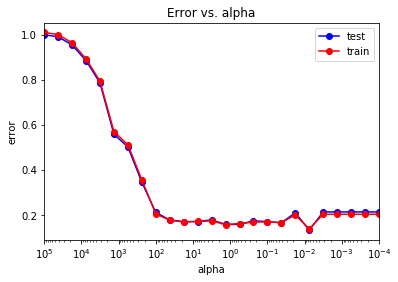

In [63]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [64]:
print(alpha_arr)

[  1.00000000e-04   2.37137371e-04   5.62341325e-04   1.33352143e-03
   3.16227766e-03   7.49894209e-03   1.77827941e-02   4.21696503e-02
   1.00000000e-01   2.37137371e-01   5.62341325e-01   1.33352143e+00
   3.16227766e+00   7.49894209e+00   1.77827941e+01   4.21696503e+01
   1.00000000e+02   2.37137371e+02   5.62341325e+02   1.33352143e+03
   3.16227766e+03   7.49894209e+03   1.77827941e+04   4.21696503e+04
   1.00000000e+05]


Минимальное значение ошибки

In [65]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.132359394606 0.137672938052


Оптимальное значение alpha

In [66]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.00749894209332


### Найдем оптимальное количество нейронов

Используем в качестве alpha значение значение по умолчанию (0.0001). Количество скрытых слоев = 2.

In [67]:
neurons_arr = np.arange(1, 100)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPRegressor(hidden_layer_sizes = (neurons, ), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))

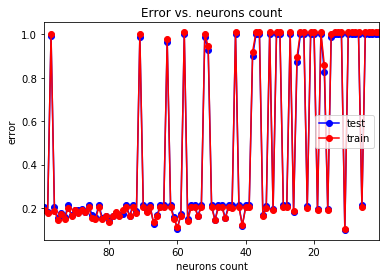

In [68]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'test')
plt.plot(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

In [69]:
mlp_model = MLPRegressor(hidden_layer_sizes = (11, ), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.0992568967128 0.102539393448


Минимальное значение ошибки

In [70]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0992568967128 0.102539393448


Оптимальное число нейронов

In [71]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)
neurons_opt = neurons_opt[0]

[11]


## Random forests
Разобьем данные на обучающую и тестовую выборки, 33% пойдет в тестовую.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [73]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators = 5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

Проверим качество регрессора по величине ошибки на тестовой и обучающей выборках.

In [74]:
print(1 - mlp_model.score(X_train, y_train), 1 - mlp_model.score(X_test, y_test))

0.0992568967128 0.102539393448


Получилось переобучение. Построим график зависимости ошибки на тестовой и обучающей выборках, а также oob-ошибки от количества деревьев.

In [75]:
tree_arr = np.arange(1, 20, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestRegressor(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    train_err.append(1 - rf.score(X_train, y_train))
    test_err.append(1 - rf.score(X_test, y_test)) 
    oob_err.append(1 - rf.oob_score_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


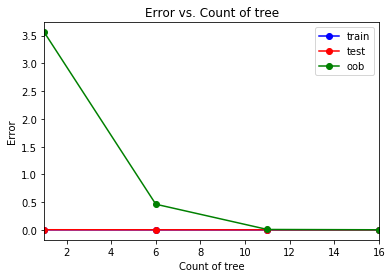

In [76]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке:

In [77]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.000389089685523
Минимальная ошибка на тестовой выборке:  0.00243402197194


Оптимальное количество деревьев:

In [78]:
tree_opt = tree_arr[test_err == min_test_err]
print(tree_opt)

[11]


## AdaBoost

Обучаем регрессор вида Ada Boost. Число регрессоров = 5.

In [79]:
ab = ensemble.AdaBoostRegressor(n_estimators = 5)
ab.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=5, random_state=None)

In [80]:
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.031318944058
Ошибка на тестовой выборке:  0.0466733948701


Графики зависимости ошибки на тестовой и обучающей выборках от кол-ва деревьев

In [81]:
estimator_arr = np.arange(1, 200, 1)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostRegressor(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))

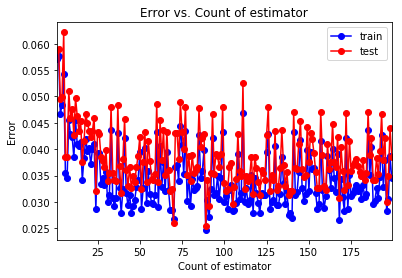

In [82]:
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке:

In [83]:
#Оптимальное число классификаторов
trees_opt = estimator_arr[test_err == min_test_err]
print(trees_opt)

[]


In [84]:
#Минимальные значения ошибок на обучающей и тестовой выборке
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0246837438923
0.0253939290163


Оптимальное количество регрессоров:

In [85]:
estimator_opt = estimator_arr[test_err == min_test_err]
print(estimator_opt)

[89]


## Gradient boosted trees

Обучаем Gradient boosted trees регрессор с количеством деревьев равным 5.

In [86]:
gbt = ensemble.GradientBoostingRegressor(n_estimators = 5)
gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [87]:
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.031318944058
Ошибка на тестовой выборке:  0.0466733948701


Построим график зависимости ошибки на тестовой и обучающей выборках от количества деревьев.

In [88]:
tree_arr = np.arange(1, 100, 5)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingRegressor(n_estimators = tree)
    gbt.fit(X_train, y_train)
    train_err.append(1 - gbt.score(X_train, y_train))
    test_err.append(1 - gbt.score(X_test, y_test))

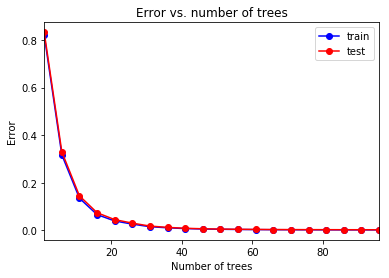

In [89]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке:

In [90]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.00170800371244
Минимальная ошибка на тестовой выборке:  0.00239854593512


Оптимальное количество деревьев:

In [91]:
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[96]


## Extremely Randomized Trees

In [92]:
ert = ensemble.ExtraTreesRegressor(n_estimators = 10)
ert.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [93]:
#ошибки на тестовой и обучающей выборках
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print(err_train)
print(err_test)

0.031318944058
0.0466733948701


C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

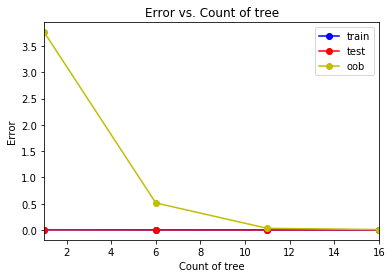

In [94]:
#переобучение
#график зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев
#oob_score = True - определяет использовать ли out-of-bag объекты для оценки
#bootstrap = True - определяет применять ли бустрэп для построения дерева
#как и RF будем регулировать высоту деревьев
tree_arr = np.arange(1, 20, 5)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesRegressor(n_estimators = tree, oob_score=True, bootstrap=True, max_depth=7)
    ert.fit(X_train, y_train)
    train_err.append(1 - ert.score(X_train, y_train))
    test_err.append(1 - ert.score(X_test, y_test)) 
    oob_err.append(1 - ert.oob_score_)
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

In [95]:
#в данном случае переобучение не наблюдается
#Минимальные значения ошибок на обучающей и тестовой выборке
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.00152041772462
0.00232509685344


In [96]:
#Оптимальное число деревьев
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[11]


## PCA

In [97]:
X1=X

In [98]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 8 ,svd_solver='full')
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [99]:
result=pca.transform(X1)

In [100]:
result.shape

(768, 8)

In [101]:
type(pca)

sklearn.decomposition.pca.PCA

In [102]:
pca.explained_variance_

array([  9.43735903e+03,   2.25270782e+03,   2.40315333e+00,
         1.25000000e+00,   1.66007179e-01,   1.69150314e-02,
         1.05846508e-04,   7.15946331e-28])

In [103]:
pca.explained_variance_ratio_

array([  8.07032434e-01,   1.92639516e-01,   2.05504811e-04,
         1.06893310e-04,   1.41960454e-05,   1.44648296e-06,
         9.05142690e-09,   6.12238984e-32])

In [104]:
#главные компоненты
pca.components_

array([[  1.07608955e-03,  -9.04057918e-01,  -5.76579398e-02,
         -4.23199989e-01,   1.59829563e-02,   3.14397732e-20,
          3.79476514e-20,  -7.21482463e-20],
       [ -1.72341722e-04,   1.25907815e-01,   9.10963014e-01,
         -3.92527600e-01,   1.46854541e-02,  -1.15395138e-20,
         -5.96188844e-21,  -9.50359818e-20],
       [ -9.86796278e-17,  -3.13404765e-16,   3.13328851e-16,
          6.25090976e-16,  -4.81787167e-17,  -1.79068321e-32,
         -1.84192707e-02,  -9.99830351e-01],
       [  1.50961602e-17,  -2.49513295e-16,   2.49551132e-16,
          4.98398806e-16,  -1.92567234e-17,  -1.00000000e+00,
         -1.41596804e-16,  -4.16333634e-17],
       [  2.10316845e-02,  -1.25797838e-02,   1.24611442e-02,
         -1.25204640e-02,  -9.99543583e-01,   1.98660902e-17,
         -4.04020528e-17,   4.80273318e-17],
       [  1.05315353e-18,   2.34612305e-15,  -2.34608559e-15,
         -4.69371391e-15,  -4.12576637e-17,   3.30749425e-17,
          9.99830351e-01,  -1.8

In [105]:
#найдём "оптимальное кол-во гл.комп."
arr_comp=[]
pca_global = PCA( n_components = 8 ,svd_solver='full')
pca_global.fit(X1)
result_global=pca_global.transform(X1)
sum=0.0
for gl in pca_global.explained_variance_:
    sum+=gl

comp_arr = np.arange(2,9)
for opt in comp_arr:
    pca_comp = PCA( n_components = opt ,svd_solver='full')
    pca_comp.fit(X1)
    result_comp=pca_comp.transform(X1)
    sum_comp=0.0
    for gl in pca_comp.explained_variance_:
        sum_comp+=gl
    if (sum_comp/sum)>0.95: arr_comp.append(opt)

In [106]:
arr_comp

[2, 3, 4, 5, 6, 7, 8]

In [107]:
#наилучшее число компонент
ncomp_opt=arr_comp[0]

In [108]:
ncomp_opt

2

In [109]:
ncomp_opt=arr_comp[0]
pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
pca_opt.fit(X1)
result_opt=pca_opt.transform(X1)
X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)

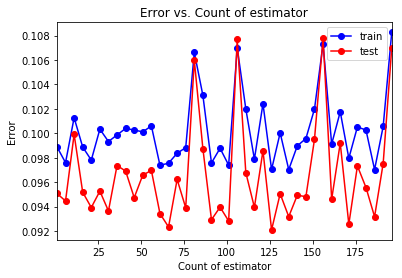

In [110]:
#графики зависимости ошибки от кол.деревьев(adaboost)
estimator_arr = np.arange(1, 200, 5)
test_err = []
train_err = []
obb_err=[]
for estimator in estimator_arr:
    ab = ensemble.AdaBoostRegressor(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [111]:
#Минимальные значения ошибок на обучающей и тестовой выборке. adaboost
#0.0954559422108 - 42 гл.комп.
#0.0895612392936 - 42 гл.комп. 

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0970254618395
0.0920890234755


In [112]:
#Оптимальное число классификаторов - на 42
trees_opt = estimator_arr[test_err == min_test_err]
print(trees_opt)

[126]


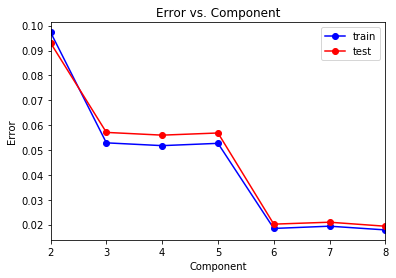

In [113]:

#кол-во главных компонент = формула ml_pres 175page
test_err = []
train_err = []
for ncomp_opt in arr_comp:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(X1)
    result_opt=pca_opt.transform(X1)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)
    ab = ensemble.AdaBoostRegressor(n_estimators = 150)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(arr_comp, train_err, 'b-o', label = 'train')
plt.plot(arr_comp, test_err, 'r-o', label = 'test')
plt.xlim([np.min(arr_comp), np.max(arr_comp)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [114]:
#Минимальные значения ошибок на обучающей и тестовой выборке. adaboost (n_estimators=150)
#0.0179837093055 - 42 гл.комп. 
#0.0192603388079 - 42 гл.комп. 

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0178738224987
0.0193586103836


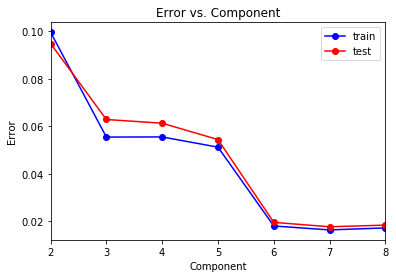

In [115]:
test_err = []
train_err = []
for ncomp_opt in comp_arr:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(X1)
    result_opt=pca_opt.transform(X1)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 42)
    ab = ensemble.AdaBoostRegressor(n_estimators = 150)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(comp_arr, train_err, 'b-o', label = 'train')
plt.plot(comp_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(comp_arr), np.max(comp_arr)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [116]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0164323962629
0.0177568882903


In [117]:
#наилучшее значение количества используемых главных компонент
print(comp_arr[test_err == min_test_err])

[7]
